In [55]:
import pandas as pd
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [56]:
def preprocess_data(s):
    s = s.lower()
    data = re.sub(r'[^\x00-\x7F]+', ' ', s)
    final_str = data.translate(None, string.punctuation)
    return final_str.strip()

In [57]:
FILE_PATH = '/home/prashant/Downloads/brain_w/data/news.csv'
df = pd.read_csv(FILE_PATH)

In [58]:
df['headline'] = df['headline'].apply(preprocess_data)

In [5]:
df['text'] = df['text'].apply(preprocess_data)

In [6]:
df["merge"] = df["headline"].map(str) +" "+ df["text"]

In [59]:
df.head()

,id,headline,text
0,uid-1,market advances 512 more,NEW YORK (AP) - A prime rate reduction by New ...
1,uid-2,district boosts request for antiterrorism aid ...,Mayor Anthony A. Williams petitioned the White...
2,uid-3,election heres how you do it mate,From our downunder perspective here in Austral...
3,uid-4,the biggest boom ever,We are about to rewrite history. Unless a rece...
4,uid-5,economic aide sees uptrend,"Sedate and scholarly Dr. Arthur Burns, the ex-..."


In [33]:
text = (df['merge'])

vectorizer = TfidfVectorizer(min_df=50)

# tokenize and build vocab
vectorizer.fit(text)

TfidfVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=50,
        ngram_range=(1, 1), norm=u'l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern=u'(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [35]:
# encode document
vector = vectorizer.transform(text)
# summarize encoded vector
print(vector.shape)
#print(vector.toarray())
vector

(3000, 1405)


<3000x1405 sparse matrix of type '<type 'numpy.float64'>'
	with 286068 stored elements in Compressed Sparse Row format>

In [36]:
import numpy as np

In [ ]:
#perform k means on this
#vector =  np.array(vector.toarray())


In [45]:
def elbow_plot(data, maxK=100):
    """
        parameters:
        - data: pandas DataFrame (data to be fitted)
        - maxK (default = 10): integer (maximum number of clusters with which to run k-means)
        
    """
    sse = {}
    for k in range(1, maxK):
        print("k: ", k)
       
        
        kmeans = KMeans(n_clusters=k, max_iter=300, n_init=100, random_state=0).fit(data)
        
        #data = kmeans.labels_
        # Inertia: Sum of distances of samples to their closest cluster center
        sse[k] = kmeans.inertia_
        print(kmeans.inertia_)
    plt.figure()
    plt.plot(list(sse.keys()), list(sse.values()))
    plt.show()
    return kmeans


('k: ', 1)
2399.14706805
('k: ', 2)
2362.37179886
('k: ', 3)
2337.06227867
('k: ', 4)
2319.97539052
('k: ', 5)
2304.89607062
('k: ', 6)
2291.07716592
('k: ', 7)
2279.52788019
('k: ', 8)
2269.63152659
('k: ', 9)
2259.95256028
('k: ', 10)
2250.58608957
('k: ', 11)
2242.23551548
('k: ', 12)
2233.46029562
('k: ', 13)
2227.68108267
('k: ', 14)
2220.38206269
('k: ', 15)
2212.4197815
('k: ', 16)
2206.36939623
('k: ', 17)
2199.35320467
('k: ', 18)
2194.51835202
('k: ', 19)
2188.12165098
('k: ', 20)
2182.25221444
('k: ', 21)
2175.31077075
('k: ', 22)
2171.1511512
('k: ', 23)
2166.76637527
('k: ', 24)
2159.32714546
('k: ', 25)
2155.36407643
('k: ', 26)
2153.48910714
('k: ', 27)
2148.65020487
('k: ', 28)
2144.3774564
('k: ', 29)
2140.87179385
('k: ', 30)
2136.54578883
('k: ', 31)
2132.56712125
('k: ', 32)
2125.94106421
('k: ', 33)
2124.7119445
('k: ', 34)
2122.92896083
('k: ', 35)
2117.79086504
('k: ', 36)
2119.00628465
('k: ', 37)
2112.33647836
('k: ', 38)
2109.74594931
('k: ', 39)
2103.29598868

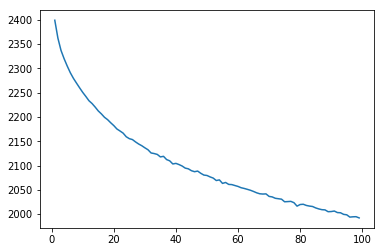

In [46]:
import matplotlib.pyplot as plt
k = elbow_plot(vector)

In [47]:
kmeans = KMeans(n_clusters=45, max_iter=300, n_init=100, random_state=0).fit(vector)

In [48]:
kmeans.predict(vector[1])[0]

10

In [49]:
def id_to_prediction():
    id_to_res = []
    for cnt,v in enumerate(vector):
        res = kmeans.predict(v)[0]
        id_ = df['id'][cnt]
        id_to_res.append((id_, res)) 
    return id_to_res

In [50]:
resu = id_to_prediction()

In [51]:
result_df = pd.DataFrame(resu,columns=['id','cluster'],index=None)

In [52]:
result_df.to_csv('/home/prashant/Downloads/brain_w/data/dataset/test/sample_submission/result.csv',index=None)

In [53]:
np.savetxt("/home/prashant/Downloads/brain_w/data/dataset/test/sample_submission/vec.txt", np.matrix(vector.toarray()))